# Final Project - Uber Data Analysis - Team 01

### Teammates:
1. Narasimha Daddala (Team Leader)
2. Yash Nayi
3. Navakanth Reddy

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

## Data Collection

Here, we will use uber data of year 2016.

The dataset used in this analysis was obtained from Kaggle.

In [2]:
uber_df = pd.read_csv("My Uber Drives - 2016.csv")

uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# 2. Data Analysis:

### Data Preparation:

Data Collection: it was collected from Kaggel. 

Data Cleaning:  Check for missing values, anomalies, or duplicates in each column.

Feature Engineering: Explore whether additional features like working houre per day, day of the week, months, day name, and duration of trips can be extracted from the start and end dates.


In [4]:
uber_df.columns = uber_df.columns.str.replace("*","")

In [5]:
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
uber_df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
uber_df = uber_df.dropna()

In [8]:
# # set string as datetime format
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'], format="%m/%d/%Y %H:%M")
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'], format="%m/%d/%Y %H:%M")

uber_df['HOUR'] = uber_df['START_DATE'].dt.hour
uber_df['DAY'] = uber_df['START_DATE'].dt.day
uber_df['MONTH'] = uber_df['START_DATE'].dt.month
uber_df['DAY_NAME'] = uber_df['START_DATE'].dt.day_name()
uber_df['DAY_OF_WEEK'] = uber_df['START_DATE'].dt.dayofweek
uber_df['DURATION'] = ((uber_df['END_DATE'] - uber_df['START_DATE']).dt.total_seconds())/60

/var/folders/m6/0h4_q4kj6rbc52p4nbqk2sj40000gn/T/ipykernel_36463/285118053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'], format="%m/%d/%Y %H:%M")
/var/folders/m6/0h4_q4kj6rbc52p4nbqk2sj40000gn/T/ipykernel_36463/285118053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'], format="%m/%d/%Y %H:%M")
/var/folders/m6/0h4_q4kj6rbc52p4nbqk2sj40000gn/T/ipykernel_36463/285118053.py:5: Setting

In [9]:
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAY_NAME,DAY_OF_WEEK,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5,18.0


In [10]:
uber_df.describe()

,START_DATE,END_DATE,MILES,HOUR,DAY,MONTH,DAY_OF_WEEK,DURATION
count,653,653,653.000000,653.00000,653.000000,653.000000,653.000000,653.000000
mean,2016-06-29 03:41:21.041347584,2016-06-29 04:04:44.931087360,11.196325,14.82389,15.719755,6.416539,3.027565,23.398162
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.00000,1.000000,1.000000,0.000000,2.000000
25%,2016-03-07 12:10:00,2016-03-07 12:26:00,3.200000,12.00000,8.000000,3.000000,1.000000,11.000000
50%,2016-06-06 21:08:00,2016-06-06 21:37:00,6.400000,15.00000,16.000000,6.000000,3.000000,18.000000
75%,2016-11-18 21:23:00,2016-11-18 21:34:00,10.400000,18.00000,23.000000,11.000000,5.000000,28.000000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,23.00000,31.000000,12.000000,6.000000,330.000000
std,NaN,NaN,22.986429,4.81733,8.840242,3.973976,1.951680,25.769640


<Axes: xlabel='CATEGORY', ylabel='count'>

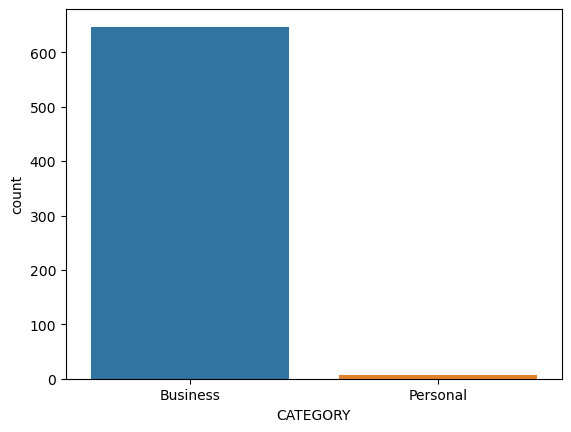

In [11]:
sns.countplot(x='CATEGORY',data=uber_df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

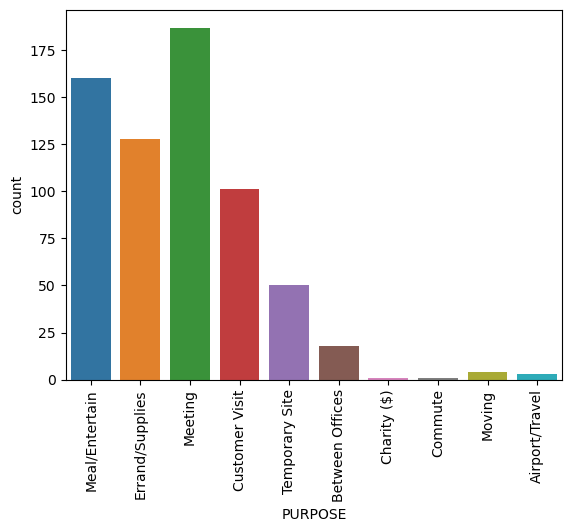

In [12]:
sns.countplot(x='PURPOSE',data=uber_df)
plt.xticks(rotation=90)

## Statistics Schema:

Descriptive Statistics: get summary statistics for numerical columns (MILES).


In [13]:
uber_df['MILES'].describe()

count    653.000000
mean      11.196325
std       22.986429
min        0.500000
25%        3.200000
50%        6.400000
75%       10.400000
max      310.300000
Name: MILES, dtype: float64

In [14]:
uber_df['HOUR'].describe()

count    653.00000
mean      14.82389
std        4.81733
min        0.00000
25%       12.00000
50%       15.00000
75%       18.00000
max       23.00000
Name: HOUR, dtype: float64

Text(0.5, 1.0, 'Number of Trips by Miles')

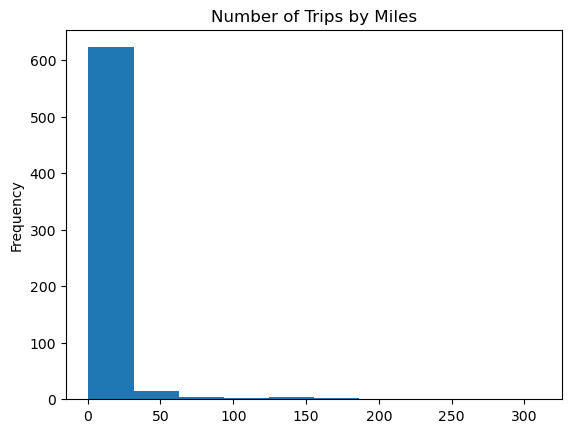

In [15]:
uber_df['MILES'].plot.hist()
plt.title("Number of Trips by Miles")

Text(0.5, 1.0, 'Number of trips Vs hours')

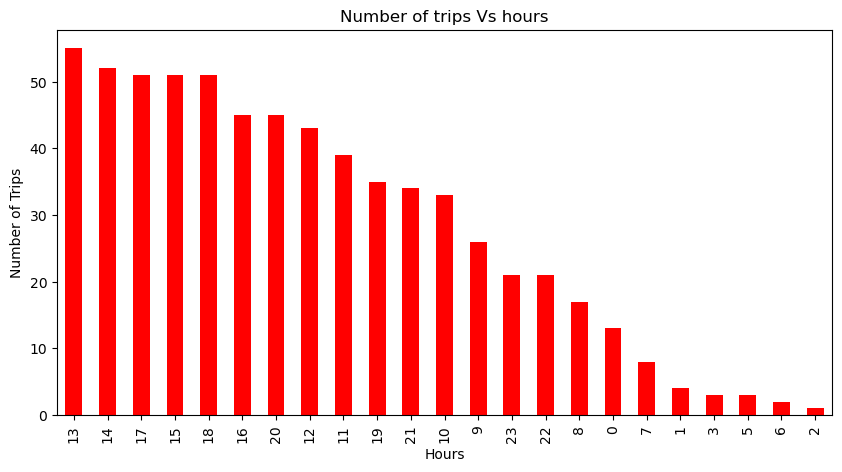

In [17]:
hours = uber_df['HOUR'].value_counts()
hours.plot(kind= 'bar', color= 'red', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

## Trip Duration Prediction:

Using features such as start time, end time, and purpose, predict the duration of a trip.

Text(0.5, 1.0, 'Number of trips Vs Months')

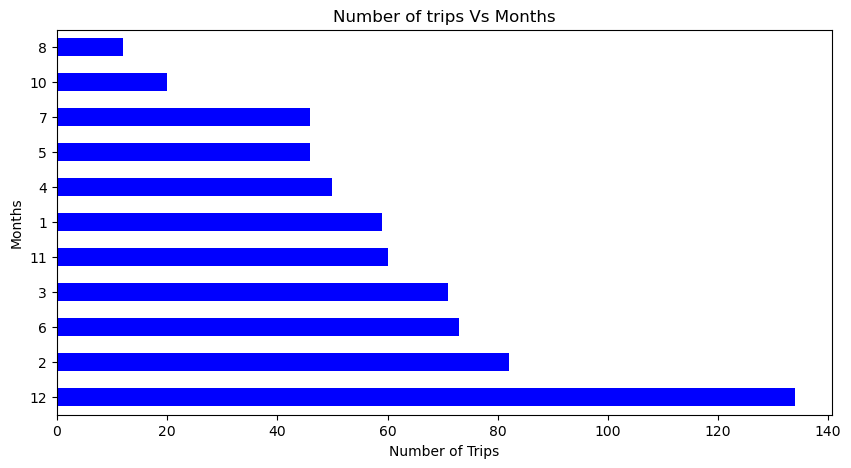

In [30]:
months = uber_df[ 'MONTH' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

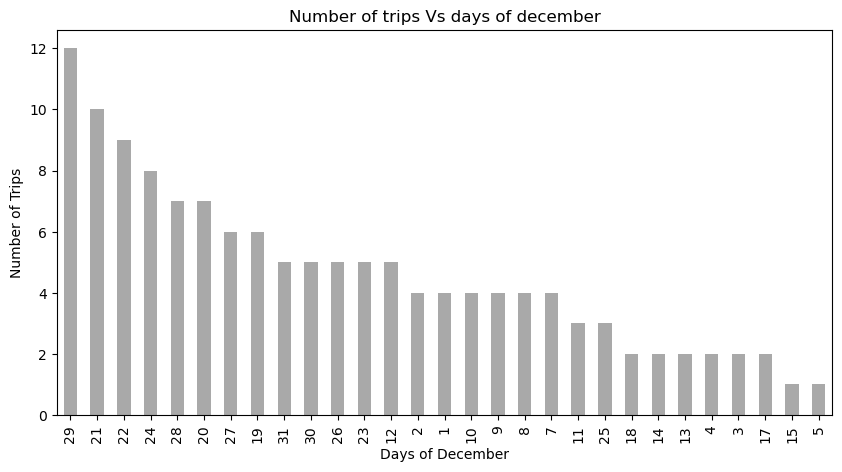

In [44]:
months = uber_df[ 'DAY' ][uber_df['MONTH']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

In [31]:
lbl_encode = LabelEncoder()
uber_df['PURPOSE']=lbl_encode.fit_transform(uber_df['PURPOSE'])

/var/folders/m6/0h4_q4kj6rbc52p4nbqk2sj40000gn/T/ipykernel_36463/2285840782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df['PURPOSE']=lbl_encode.fit_transform(uber_df['PURPOSE'])


In [32]:
# Define feature and target
feature = ['HOUR', 'DAY_OF_WEEK', 'PURPOSE']
X = uber_df[feature]
y = uber_df['DURATION']

In [33]:
# split data into training model and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train

(      HOUR  DAY_OF_WEEK  PURPOSE
 1094    18            3        9
 558     11            6        2
 30      14            0        6
 368     21            2        7
 287     12            3        9
 ...    ...          ...      ...
 73      20            3        7
 120     16            2        5
 352     20            2        5
 674     18            2        9
 116     17            1        5
 
 [522 rows x 3 columns],
 1094     9.0
 558     27.0
 30      11.0
 368     17.0
 287     35.0
         ... 
 73      19.0
 120      5.0
 352     19.0
 674     19.0
 116      4.0
 Name: DURATION, Length: 522, dtype: float64)

In [34]:
uber_model = LinearRegression()
uber_model.fit(X_train, y_train)


LinearRegression()

In [35]:
predict = uber_model.predict(X_test)


print("Root mean square error : ",mean_squared_error(y_test, predict, squared=False))

Root mean square error :  19.008646049397083


# Visualization for Trip Durations:

a. Distribution of Trip Durations:
Visualize the distribution of trip durations to understand their spread and central tendency.

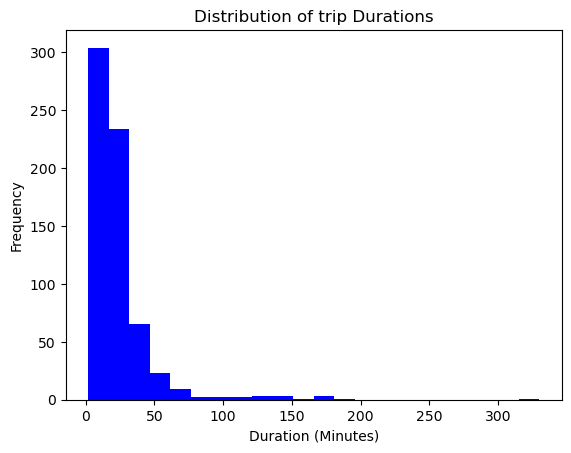

In [36]:
plt.hist(uber_df['DURATION'], bins=22, color='blue')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of trip Durations')
plt.show()

## Analyzing Purposes Across Categories:

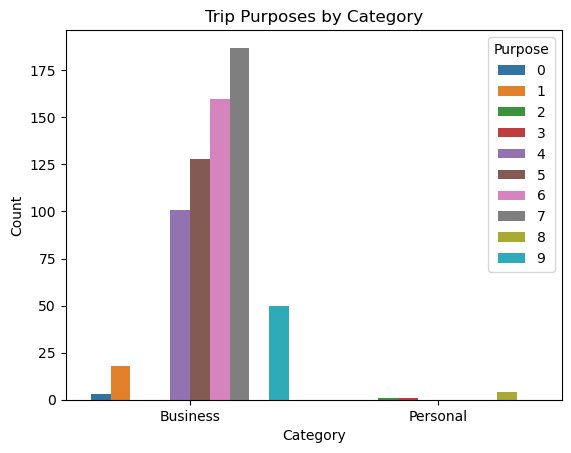

In [ ]:
sns.countplot(data=uber_df, x=uber_df['CATEGORY'], hue=uber_df['PURPOSE'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Trip Purposes by Category')
plt.legend(title='Purpose')
plt.show()

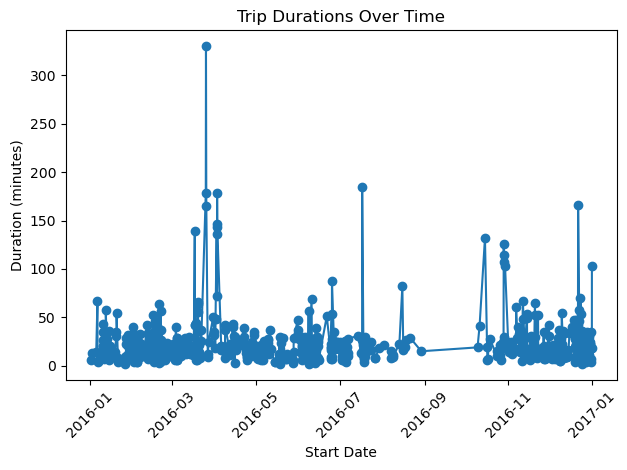

In [38]:
# Plotting trip durations over time
plt.plot(uber_df['START_DATE'], uber_df['DURATION'], marker='o', linestyle='-')
plt.xlabel('Start Date')
plt.ylabel('Duration (minutes)')
plt.title('Trip Durations Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'number of trips vs days')

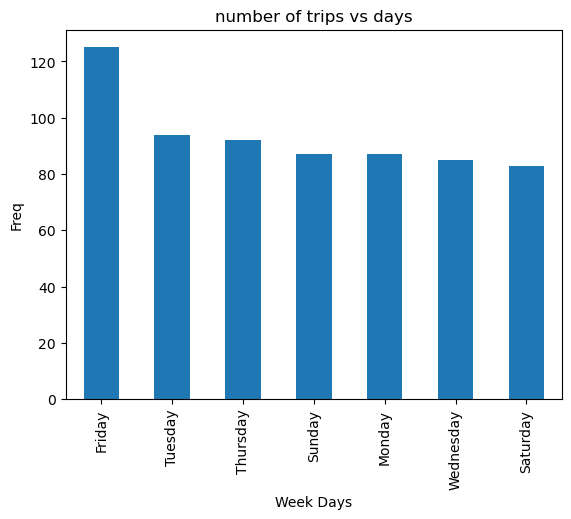

In [39]:
uber_df['DAY_NAME'].value_counts().plot(kind='bar')
plt.xlabel("Week Days")
plt.ylabel("Freq")
plt.title("number of trips vs days")

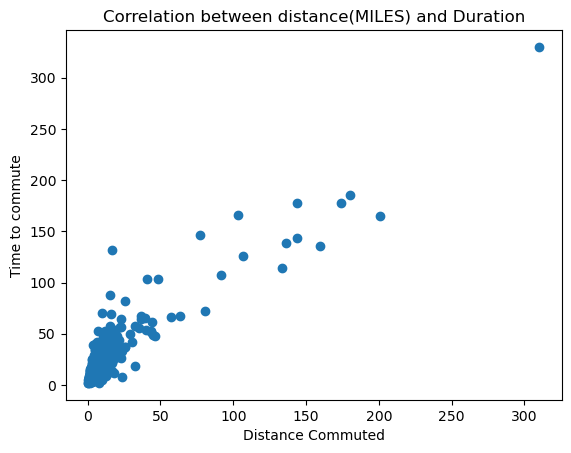

In [40]:
plt.scatter(uber_df['MILES'], uber_df['DURATION'])
plt.xlabel('Distance Commuted')
plt.ylabel('Time to commute')
plt.title('Correlation between distance(MILES) and Duration')
plt.show()

/Users/narasimha_daddala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/narasimha_daddala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/narasimha_daddala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/narasimha_daddala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

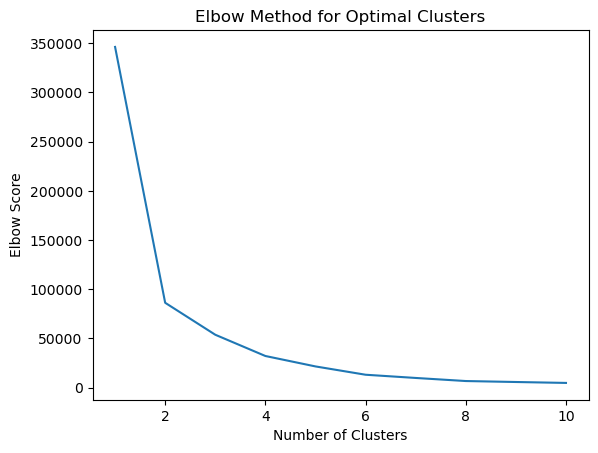

In [41]:
from sklearn.cluster import KMeans

# Assuming 'PURPOSE', 'DISTANCE', 'FREQUENCY' are relevant features
segmentation_features = ['PURPOSE', 'MILES']

# Select features for segmentation
segment_data = uber_df[segmentation_features]

# Normalize data if required (using StandardScaler)
# This step is often recommended before clustering
# Apply suitable preprocessing based on your data characteristics

# Determine optimal number of clusters (using, for example, the Elbow Method)
# Assuming 'elbow' method finds optimal clusters
elbow_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segment_data)
    elbow_scores.append(kmeans.inertia_)

# Plot Elbow Method to find optimal clusters
plt.plot(range(1, 11), elbow_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method for Optimal Clusters')
plt.show()




<Figure size 1200x600 with 0 Axes>

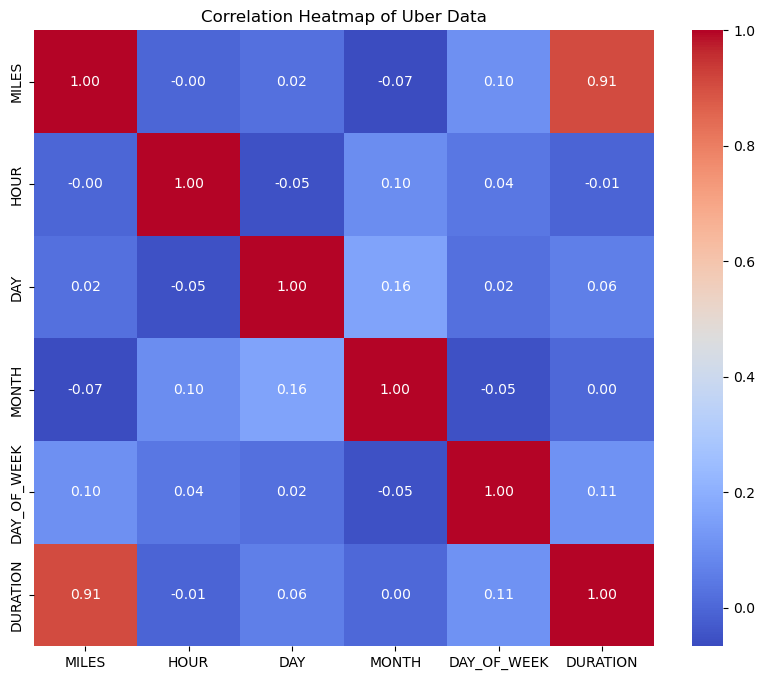

In [42]:
plt.figure(figsize=(12, 6))

# Selecting numerical columns for the heatmap
heatmap_feature = ['MILES', 'HOUR', 'DAY', 'MONTH', 'DAY_OF_WEEK', 'DURATION']

# Calculating correlation matrix
corr_matrix = uber_df[heatmap_feature].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Uber Data')
plt.show()